## Self Organizing Maps(SOM)

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import dataset

In [2]:
df = pd.read_csv("data/Credit_Card_Applications.csv")

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### Dataset information

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

#### Attribute Information:

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3.

* A1: 0,1 CATEGORICAL (formerly: a,b)
* A2: continuous.
* A3: continuous.
* A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)
* A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
* A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)
* A7: continuous.
* A8: 1, 0 CATEGORICAL (formerly: t, f)
* A9: 1, 0 CATEGORICAL (formerly: t, f)
* A10: continuous.
* A11: 1, 0 CATEGORICAL (formerly t, f)
* A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)
* A13: continuous.
* A14: continuous.
* A15: 1,2 class attribute (formerly: +,-)

Class `0` refers application is not approved and Class value `1` refers the application is approved.

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
x = sc.fit_transform(x)

In [6]:
x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Training the Som

In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [8]:
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

### Visualise the results

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()

<Figure size 432x288 with 0 Axes>

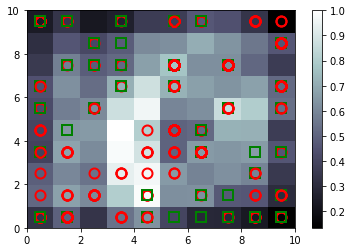

In [10]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
        markeredgewidth=2)
show()

### Finding the frauds

In [11]:
mappings = som.win_map(x)

In [12]:
mappings

defaultdict(list,
            {(9, 4): [0.10690788815075791,
              1.0,
              0.40977443609022557,
              0.0014285714285714286,
              0.5,
              0.6923076923076923,
              0.375,
              0.0014035087719298245,
              1.0,
              0.014925373134328358,
              0.28],
             (0, 8): [0.0, 0.0, 0.0, 0.0]})

In [14]:
frauds = np.concatenate((mappings[(4,1)], mappings[(4,0)]), axis=0)

In [15]:
frauds

array([], dtype=float64)

In [16]:
frauds = sc.inverse_transform(frauds.reshape(1, -1))

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.